In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score
from pygam import LogisticGAM
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


### Data Preprocessing

In [2]:
raw_data = pd.read_csv("../../data_clean.csv")
data = raw_data[raw_data['birth date'] < 2020].copy()

data['age'] = data['parole board interview date'] - data['birth date']
data['jail duration'] = data['parole board interview date'] - data['year of entry']

others_parole_type =  ['PIE', 'SP CONSDR', 'ECPDO', 'MEDICAL','RESCISSION', 'DEPORT']
data['parole board interview type'] = data['parole board interview type'].replace(others_parole_type, 'OTHERS').replace('SUPP MERIT', 'MERIT TIME').replace('PV REAPP', 'REAPPEAR')

data = data.dropna(axis=0, subset=['crime 1 - class', 'parole eligibility date'])

df_one_hot = pd.get_dummies(data, columns=[
    "sex", "race / ethnicity"], drop_first=True)

df_one_hot = pd.get_dummies(df_one_hot, columns=[
    "crime 1 - class", "crime 2 - class",
    "crime 3 - class", "crime 4 - class",
    "parole board interview type"])
df_one_hot.drop(columns=['release date','birth date', 'year of entry'],inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_one_hot.drop('y',axis=1), df_one_hot['y'], 
                                                    stratify=df_one_hot['y'], test_size=0.3, random_state=42)

### GAM

In [3]:
# Create a DummyClassifier
gam = LogisticGAM()

# Fit the DummyClassifier on the training data
gam.fit(X_train, y_train)

# Make predictions on both the training and test datasets
train_predictions = gam.predict(X_train)
test_predictions = gam.predict(X_test)

# Calculate evaluation metrics for the training dataset
train_accuracy = accuracy_score(y_train, train_predictions)
train_balanced_accuracy = balanced_accuracy_score(y_train, train_predictions)
train_roc_auc = roc_auc_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)

# Calculate evaluation metrics for the test dataset
test_accuracy = accuracy_score(y_test, test_predictions)
test_balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

# Print the evaluation metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Balanced Accuracy: {train_balanced_accuracy:.2f}")
print(f"ROC AUC: {train_roc_auc:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Balanced Accuracy: {test_balanced_accuracy:.2f}")
print(f"ROC AUC: {test_roc_auc:.2f}")
print(f"F1 Score: {test_f1:.2f}")

Training Metrics:
Accuracy: 0.80
Balanced Accuracy: 0.52
ROC AUC: 0.52
F1 Score: 0.10

Test Metrics:
Accuracy: 0.80
Balanced Accuracy: 0.53
ROC AUC: 0.53
F1 Score: 0.11


### Decision Trees

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, class_weight='balanced')

# Fit the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on both the training and test datasets
train_predictions = dt_classifier.predict(X_train)
test_predictions = dt_classifier.predict(X_test)

# Calculate evaluation metrics for the training dataset
train_accuracy = accuracy_score(y_train, train_predictions)
train_balanced_accuracy = balanced_accuracy_score(y_train, train_predictions)
train_roc_auc = roc_auc_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)

# Calculate evaluation metrics for the test dataset
test_accuracy = accuracy_score(y_test, test_predictions)
test_balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

# Print the evaluation metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Balanced Accuracy: {train_balanced_accuracy:.2f}")
print(f"ROC AUC: {train_roc_auc:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Balanced Accuracy: {test_balanced_accuracy:.2f}")
print(f"ROC AUC: {test_roc_auc:.2f}")
print(f"F1 Score: {test_f1:.2f}")

Training Metrics:
Accuracy: 0.70
Balanced Accuracy: 0.63
ROC AUC: 0.63
F1 Score: 0.41

Test Metrics:
Accuracy: 0.71
Balanced Accuracy: 0.64
ROC AUC: 0.64
F1 Score: 0.42


### Decision Tree used within global surrogate model

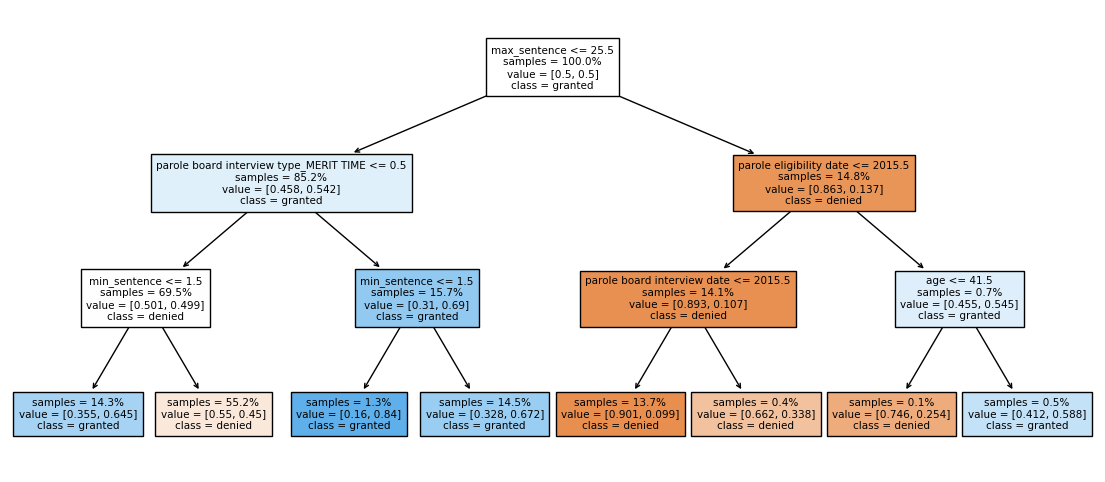

In [5]:
plt.figure(figsize=(14, 6))
tree = plot_tree(dt_classifier, feature_names=X_train.columns, class_names=['denied', 'granted'], filled=True, impurity=False, fontsize=7.5, proportion=True)
plt.show()